# Sport

This notebook shows how to use scikit-network to analyse sport data. 

We here consider the results of tennis matches of [ATP Tour](https://en.wikipedia.org/wiki/ATP_Tour) in the period 2002--2005.

In [ ]:
from IPython.display import SVG

In [26]:
import numpy as np
import pandas as pd
from scipy import sparse

In [96]:
from sknetwork.data import from_edge_list
from sknetwork.ranking import PageRank, top_k
from sknetwork.topology import CoreDecomposition
from sknetwork.utils import directed2undirected
from sknetwork.embedding import Spectral
from sknetwork.visualization import svg_digraph, svg_graph

## Load data

In [3]:
filename = 'atp.csv'

In [4]:
df = pd.read_csv(filename, sep=';')

In [5]:
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,L4,W5,L5,Wsets,Lsets,Comment,MaxW,MaxL,AvgW,AvgL
0,25,Houston,U.S. Men's Clay Court Championships,2005-04-21,International,Outdoor,Clay,2nd Round,3,Haas T.,...,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN
1,26,Estoril,Estoril Open,2005-04-27,International Series,Outdoor,Clay,2nd Round,3,Gaudio G.,...,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN
2,28,Rome,Telecom Italia Masters Roma,2005-05-03,Masters,Outdoor,Clay,1st Round,3,Sanguinetti D.,...,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN
3,28,Rome,Telecom Italia Masters Roma,2005-05-04,Masters,Outdoor,Clay,2nd Round,3,Almagro N.,...,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN
4,29,Hamburg,Hamburg TMS,2005-05-11,Masters,Outdoor,Clay,2nd Round,3,Hrbaty D.,...,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN


In [6]:
df = df[df['Comment']=='Completed']

In [7]:
len(df)

42261

## Build graph

In [8]:
edge_list = list(df[['Winner', 'Loser']].itertuples(index=False, name=None))

In [9]:
len(edge_list)

42261

In [14]:
graph = from_edge_list(edge_list, directed=True)

In [15]:
adjacency = graph.adjacency
names = graph.names

In [16]:
adjacency

<1255x1255 sparse matrix of type '<class 'numpy.int64'>'
	with 28212 stored elements in Compressed Sparse Row format>

In [17]:
len(names)

1255

## Ranking

In [24]:
# top-10 players in number of wins
out_weights = adjacency.dot(np.ones(len(names)))
print(names[top_k(out_weights, 10)])

['Federer R.' 'Nadal R.' 'Djokovic N.' 'Ferrer D.' 'Murray A.'
 'Roddick A.' 'Berdych T.' 'Robredo T.' 'Davydenko N.' 'Hewitt L.']


In [36]:
# top-10 players in terms of PageRank
pagerank = PageRank()
adjacency_transpose = sparse.csr_matrix(adjacency.T)
scores = pagerank.fit_transform(adjacency_transpose)
print(names[top_k(scores, 10)])

['Federer R.' 'Nadal R.' 'Djokovic N.' 'Murray A.' 'Ferrer D.'
 'Roddick A.' 'Berdych T.' 'Hewitt L.' 'Davydenko N.' 'Wawrinka S.']


In [78]:
index = top_k(scores, 10)
sub_adjacency = adjacency[index][:, index]

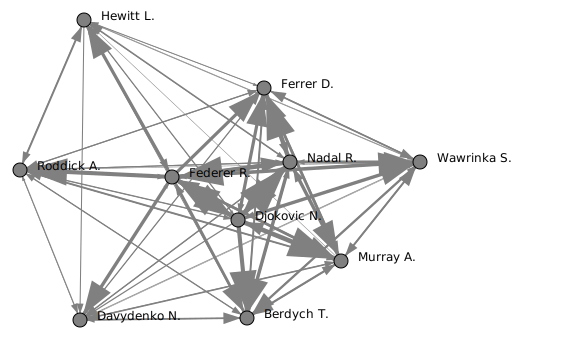

In [82]:
SVG(svg_digraph(sub_adjacency, names=names[index], scores=scores[index]))

## Core decomposition

In [65]:
algo = CoreDecomposition()

In [66]:
adjacency_sym = directed2undirected(adjacency)

In [67]:
labels = algo.fit_transform(adjacency_sym)

In [69]:
print(names[labels == algo.core_value_])

['Acasuso J.' 'Almagro N.' 'Ancic M.' 'Anderson K.' 'Andreev I.'
 'Andujar P.' 'Baghdatis M.' 'Beck K.' 'Becker B.' 'Bellucci T.'
 'Benneteau J.' 'Berdych T.' 'Berlocq C.' 'Berrer M.' 'Bjorkman J.'
 'Blake J.' 'Bolelli S.' 'Calleri A.' 'Canas G.' 'Chardy J.' 'Chela J.I.'
 'Cilic M.' 'Clement A.' 'Coria G.' 'Cuevas P.' 'Darcis S.' 'Davydenko N.'
 'Del Potro J.M.' 'Dent T.' 'Dimitrov G.' 'Djokovic N.' 'Dodig I.'
 'Dolgopolov O.' 'Falla A.' 'Federer R.' 'Ferrer D.' 'Ferrero J.C.'
 'Fish M.' 'Fognini F.' 'Gabashvili T.' 'Garcia-Lopez G.' 'Gasquet R.'
 'Gaudio G.' 'Gicquel M.' 'Gimeno-Traver D.' 'Ginepri R.' 'Giraldo S.'
 'Golubev A.' 'Gonzalez F.' 'Granollers M.' 'Grosjean S.' 'Gulbis E.'
 'Haas T.' 'Haase R.' 'Hanescu V.' 'Harrison R.' 'Henman T.' 'Hernych J.'
 'Hewitt L.' 'Horna L.' 'Hrbaty D.' 'Isner J.' 'Istomin D.' 'Johansson T.'
 'Karlovic I.' 'Kiefer N.' 'Kohlschreiber P.' 'Korolev E.' 'Koubek S.'
 'Kubot L.' 'Kunitsyn I.' 'Lapentti N.' 'Lee H.T.' 'Ljubicic I.'
 'Llodra M.' 'Lopez F

## Embedding

In [98]:
spectral = Spectral(2, normalized=False)

In [99]:
embedding = spectral.fit_transform(adjacency)

In [100]:
index = np.argwhere(labels == algo.core_value_).ravel()

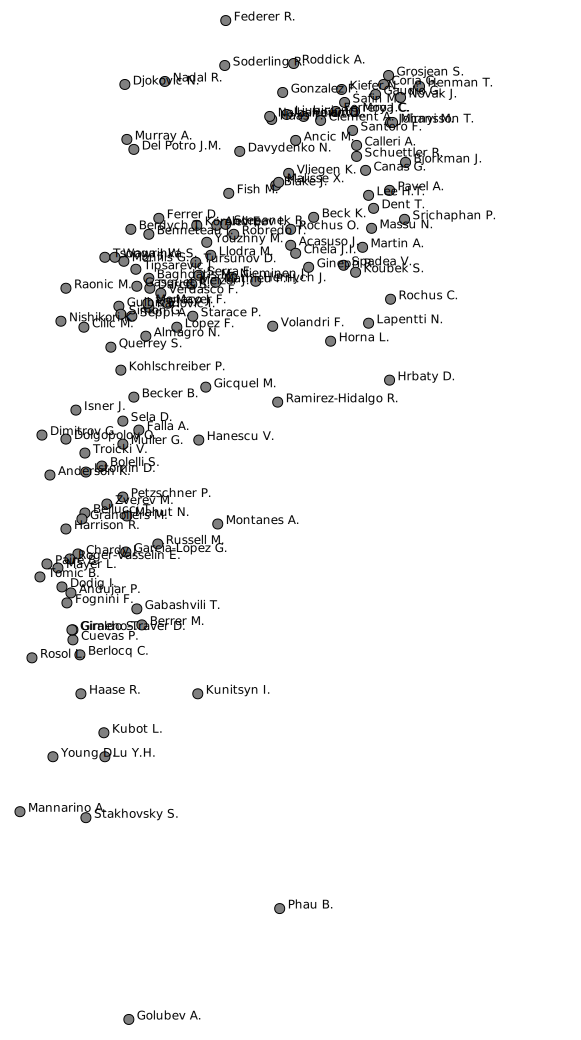

In [101]:
SVG(svg_graph(position=embedding[index], names=names[index], scores=scores[index], node_size=5, width=400, height=1000))